In [1]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'Serif'

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from scikitplot.metrics import plot_roc_curve
from feature_engine.discretisation import EqualFrequencyDiscretiser
from category_encoders.woe import WOEEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from scipy import interp
from matplotlib import patches


In [2]:
df = pd.read_csv(r"diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dfcopy = df.copy(deep = True)
dfcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dfcopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
dfcopy['Glucose'].fillna(dfcopy['Glucose'].mean(), inplace = True)
dfcopy['BloodPressure'].fillna(dfcopy['BloodPressure'].mean(), inplace = True)
dfcopy['SkinThickness'].fillna(dfcopy['SkinThickness'].median(), inplace = True)
dfcopy['Insulin'].fillna(dfcopy['Insulin'].median(), inplace = True)
dfcopy['BMI'].fillna(dfcopy['BMI'].median(), inplace = True)

In [7]:
label_encoder = preprocessing.LabelEncoder()
dfcopy['Glucose_type']=label_encoder.fit_transform(df['Glucose'])
dfcopy['Insulin_type']=label_encoder.fit_transform(df['Insulin'])

In [8]:
del dfcopy['Glucose']
del dfcopy['Insulin']

In [9]:
dfcopy.head()

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_type,Insulin_type
0,6,72.0,35.0,33.6,0.627,50,1,86,0
1,1,66.0,29.0,26.6,0.351,31,0,23,0
2,8,64.0,29.0,23.3,0.672,32,1,121,0
3,1,66.0,23.0,28.1,0.167,21,0,27,62
4,0,40.0,35.0,43.1,2.288,33,1,75,102


In [10]:
x=dfcopy[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Glucose_type','Insulin_type']]
y=dfcopy[['Outcome']]
x.shape

(768, 8)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
scaler=StandardScaler()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=30)

In [13]:


#scaled the x (train and test data)
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)
print("Mean value:",x_train_scaled.mean(axis=0))
print("SD value:",x_train_scaled.std(axis=0))

Mean value: [ 3.36978262e-17  1.01695226e-16  3.36978262e-17 -4.69362580e-16
  9.62795035e-17 -1.78117081e-16  2.64768635e-17  6.07764366e-17]
SD value: [1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
gaus=GaussianNB()
gaus.fit(x_train_scaled, y_train)

GaussianNB()

GaussianNB()

In [15]:
gaus.score(x_test_scaled,y_test)*100

83.33333333333334

In [16]:
prediction = gaus.predict(x_test_scaled)

print(prediction)

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]


<Axes: >

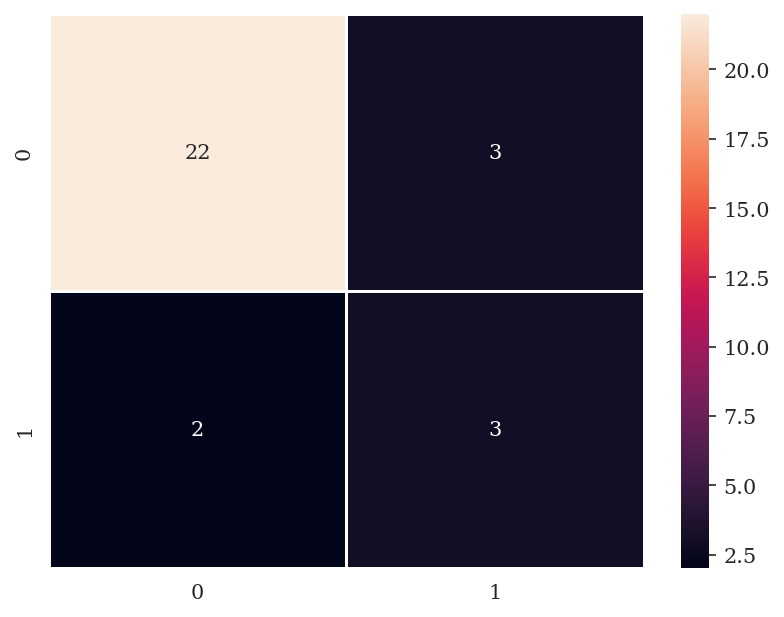

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conmat=confusion_matrix(y_test,prediction)


sns.heatmap(conmat, annot=True, linewidth=0.5)



ROC CURVE CODE BEGINS HERE:

In [18]:
# data=pd.read_csv(r"C:\Users\imodg\Downloads\diabetes.csv")

from sklearn.metrics import roc_auc_score

In [19]:
print(dfcopy.columns)

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_type',
       'Insulin_type'],
      dtype='object')


In [20]:
lvc= dfcopy.value_counts()
print(lvc)

Pregnancies  BloodPressure  SkinThickness  BMI   DiabetesPedigreeFunction  Age  Outcome  Glucose_type  Insulin_type
0            40.0           35.0           43.1  2.288                     33   1        75            102             1
             50.0           29.0           21.9  0.254                     65   0        99            0               1
5            72.0           23.0           26.2  0.245                     30   0        59            71              1
                            28.0           23.9  0.407                     27   0        49            0               1
                            29.0           36.9  0.159                     28   0        43            157             1
                                                                                                                      ..
2            56.0           27.0           29.0  0.426                     22   0        44            99              1
                            28.0     

In [21]:
print(dfcopy.info)

<bound method DataFrame.info of      Pregnancies  BloodPressure  SkinThickness   BMI  \
0              6           72.0           35.0  33.6   
1              1           66.0           29.0  26.6   
2              8           64.0           29.0  23.3   
3              1           66.0           23.0  28.1   
4              0           40.0           35.0  43.1   
..           ...            ...            ...   ...   
763           10           76.0           48.0  32.9   
764            2           70.0           27.0  36.8   
765            5           72.0           23.0  26.2   
766            1           60.0           29.0  30.1   
767            1           70.0           31.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_type  Insulin_type  
0                       0.627   50        1            86             0  
1                       0.351   31        0            23             0  
2                       0.672   32        1           121             0  

In [22]:
dict = {'Outcome':{'Diabetic':1,'Not Diabetic':0}}

In [23]:
dfcopy.replace(dict, inplace=True)
x= dfcopy.loc[:, dfcopy.columns !='Outcome']
y=dfcopy.loc[:, 'Outcome']

In [24]:
random_state = np.random.RandomState(0)

clf = RandomForestClassifier(random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=False)

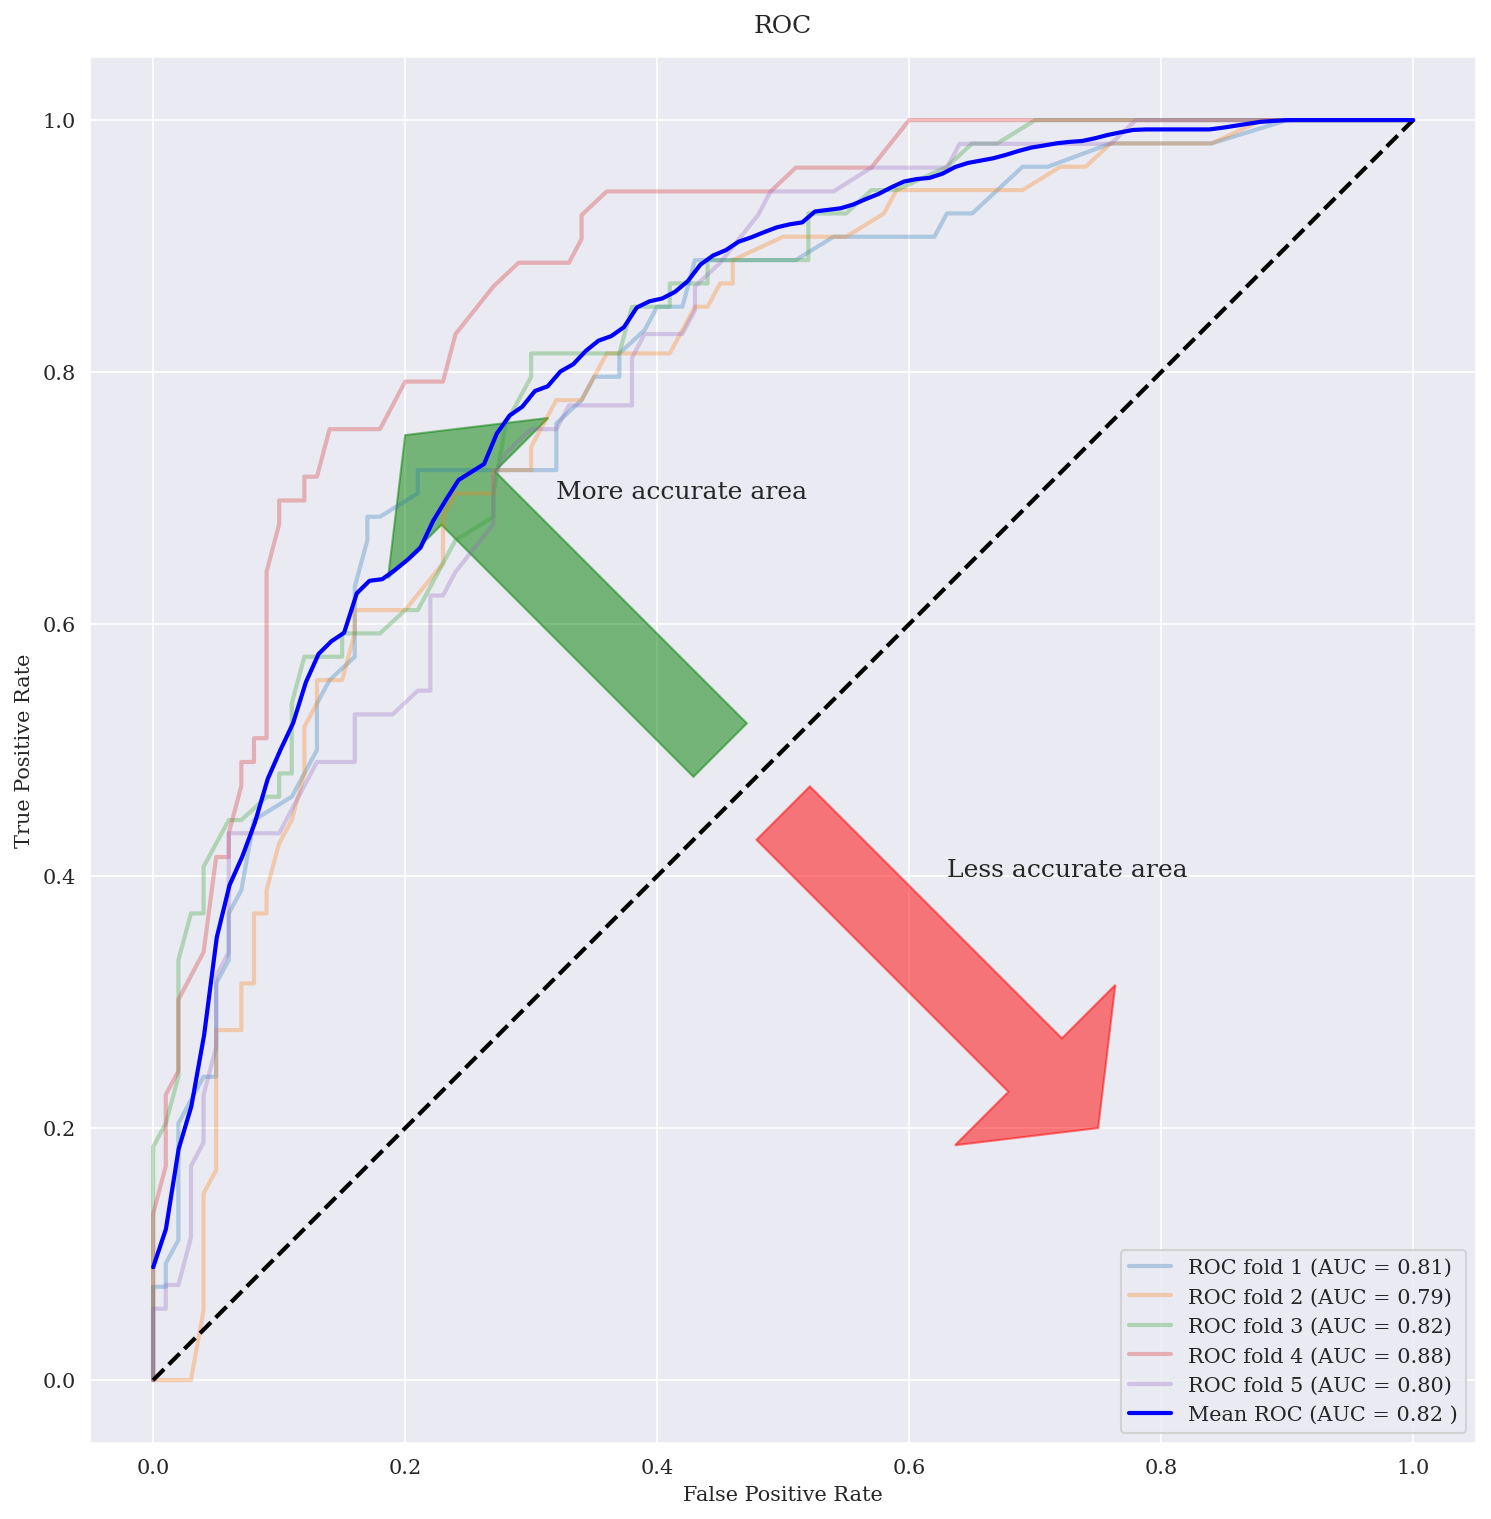

In [25]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r"diabetes.csv")

In [27]:
plt.figure(figsize=(10, 10))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Axes: >

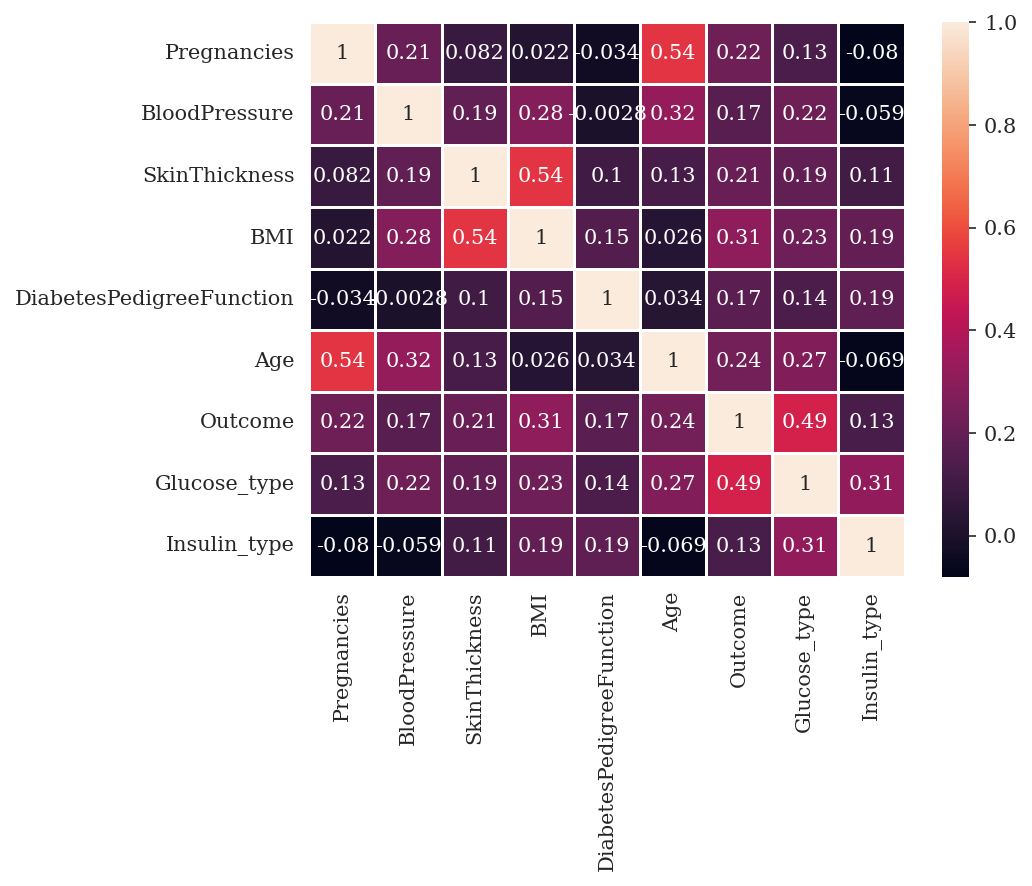

In [28]:
sns.heatmap(dfcopy.corr(), annot=True, linewidth=0.5)

Classification report

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [30]:
np.random.seed(1)

df=pd.read_csv(r"diabetes.csv")

dfcopy.head()

,Pregnancies,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_type,Insulin_type
0,6,72.0,35.0,33.6,0.627,50,1,86,0
1,1,66.0,29.0,26.6,0.351,31,0,23,0
2,8,64.0,29.0,23.3,0.672,32,1,121,0
3,1,66.0,23.0,28.1,0.167,21,0,27,62
4,0,40.0,35.0,43.1,2.288,33,1,75,102


In [31]:
x=dfcopy[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]
y=dfcopy[['Outcome']]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
Logistic_regression= LogisticRegression()

Logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = Logistic_regression.predict(x_test) 


print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))

Accuracy: 69.6969696969697
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       157
           1       0.54      0.35      0.43        74

    accuracy                           0.70       231
   macro avg       0.64      0.61      0.61       231
weighted avg       0.67      0.70      0.68       231






following code was adapted from Kaggle User SHRUTI_IYYER
Link: https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions


In [36]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [37]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [38]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.26406926406926 % and k = [14]


65.36796536796537


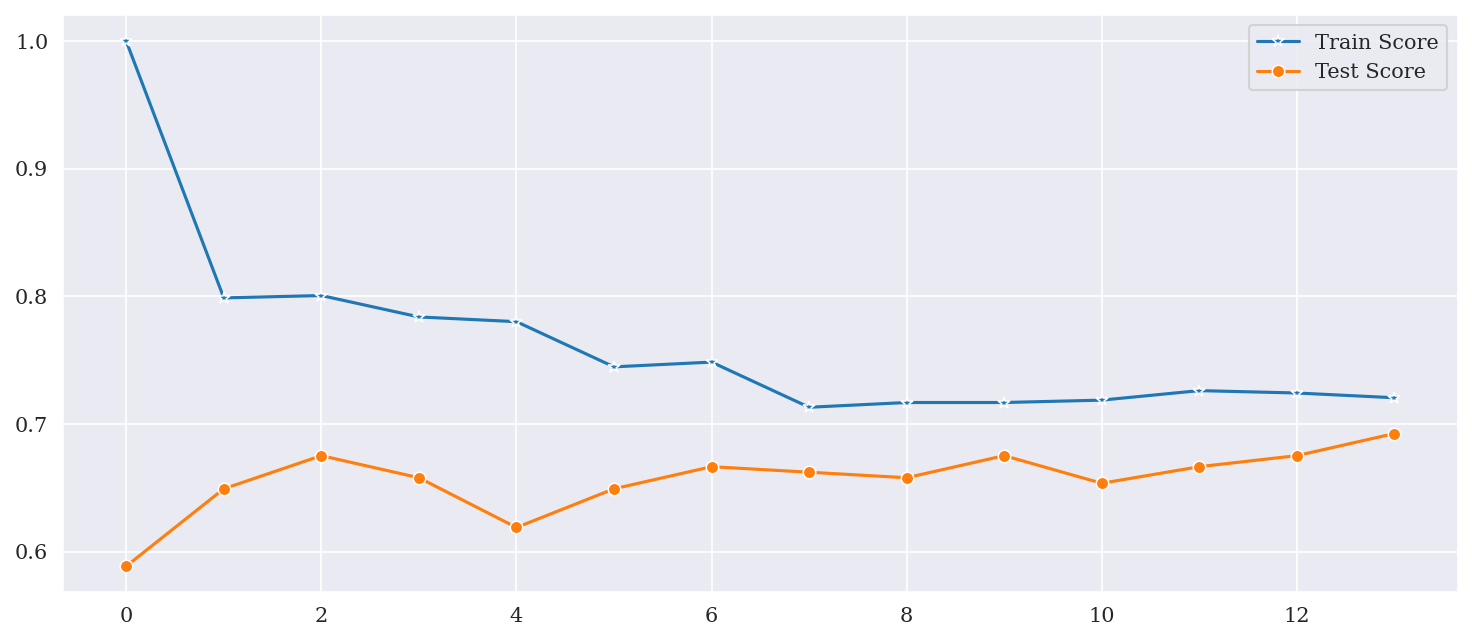

In [39]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')


knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
print(knn.score(x_test,y_test) * 100)

In [40]:
# Random Forest tree

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

In [42]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:8]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [43]:
X_train.shape, X_test.shape

((514, 8), (254, 8))

In [44]:


from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(criterion= 'entropy', random_state=0)


model.fit(X_train, y_train)



y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7717


In [45]:


model1 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True, verbose=2,
                               max_features = 'sqrt', random_state=0)
                                #n_estimators: quantity of trees
                                #bootstrap: train with differents samples sizes
                                #max_features: max features per tree
                                #
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))


model1.feature_importances_

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0.08649695, 0.24266306, 0.08308545, 0.06807769, 0.07098889,
       0.1669435 , 0.12426823, 0.15747624])

In [46]:
X1 = df[['Pregnancies','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.33, random_state = 0)
model.fit(X_train1, y_train)

# Predict the Test set results

y_pred1 = model.predict(X_test1)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))

Model accuracy score is : 0.7008


In [48]:
model.feature_importances_

array([0.11460264, 0.12861032, 0.10824601, 0.25176022, 0.19509903,
       0.20168178])

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[153  17]
 [ 41  43]]


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       170
           1       0.72      0.51      0.60        84

    accuracy                           0.77       254
   macro avg       0.75      0.71      0.72       254
weighted avg       0.76      0.77      0.76       254



In [51]:

model3 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt', max_depth = 4,random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)
model3.fit(X_train2, y_train2)



y_pred2 = model3.predict(X_test2)

 

from sklearn.metrics import accuracy_score

print('Model accuracy score with max_depth = 20 is : {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))

Model accuracy score with max_depth = 20 is : 0.8117


[Text(0.5431034482758621, 0.9, 'x[4] <= 109.0\ngini = 0.455\nsamples = 388\nvalue = [399, 215]'),
 Text(0.27586206896551724, 0.7, 'x[7] <= 29.5\ngini = 0.413\nsamples = 264\nvalue = [290, 119]'),
 Text(0.13793103448275862, 0.5, 'x[0] <= 6.5\ngini = 0.249\nsamples = 138\nvalue = [188, 32]'),
 Text(0.06896551724137931, 0.3, 'x[5] <= 45.1\ngini = 0.216\nsamples = 134\nvalue = [185, 26]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.183\nsamples = 131\nvalue = [185, 21]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 5]'),
 Text(0.20689655172413793, 0.3, 'x[2] <= 30.0\ngini = 0.444\nsamples = 4\nvalue = [3, 6]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 6]'),
 Text(0.41379310344827586, 0.5, 'x[5] <= 26.7\ngini = 0.497\nsamples = 126\nvalue = [102, 87]'),
 Text(0.3448275862068966, 0.3, 'x[6] <= 0.133\ngini = 0.095\nsamples = 27\nvalue = [38, 2]'),
 Text(0.3103448275

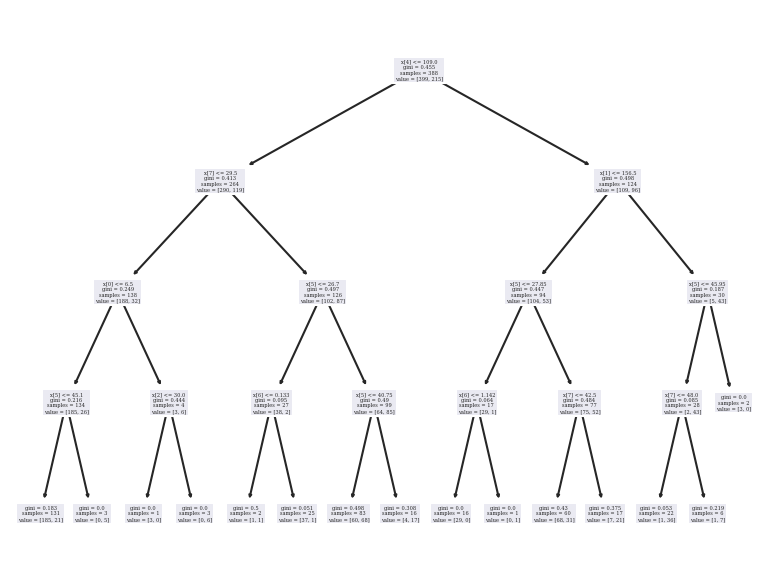

In [52]:
#See the forest
from sklearn import tree
tree.plot_tree(model3.estimators_[0])